# Homework 1

### Exercise 1 a-c:

In [32]:
# import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
# import data using pandas
df = pd.read_csv('dataset.csv',header = None)
#print(df)

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print(X)
print(X.shape)

[[1.283e+01 2.233e+01 8.526e+01 ... 1.977e-01 3.407e-01 1.243e-01]
 [1.286e+01 1.332e+01 8.282e+01 ... 1.155e-01 2.382e-01 8.553e-02]
 [1.793e+01 2.448e+01 1.152e+02 ... 1.136e-01 2.504e-01 7.948e-02]
 ...
 [1.468e+01 2.013e+01 9.474e+01 ... 1.609e-01 3.029e-01 8.216e-02]
 [1.757e+01 1.505e+01 1.150e+02 ... 1.456e-01 2.756e-01 7.919e-02]
 [1.154e+01 1.072e+01 7.373e+01 ... 4.715e-02 3.390e-01 7.434e-02]]
(512, 30)


### Preprocessing

In [34]:
# Splitting the data into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [35]:
# imputation
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [36]:
# scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Classification

In [37]:
# Use any two classifiers
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

SVC = SVC()
SVC.fit(X_train,y_train)

y2_SVC_model = SVC.predict(X_test)
print("SVC Accuracy :", accuracy_score(y_test, y2_SVC_model))

KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

y2_KNN_model = KNN.predict(X_test)
print("KNN Accuracy :", accuracy_score(y_test, y2_KNN_model))

SVC Accuracy : 0.9902912621359223
KNN Accuracy : 0.941747572815534


Classification report for SVR:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      1.00      0.99        36

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103

Classification report for KNN:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.92      0.92      0.92        36

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



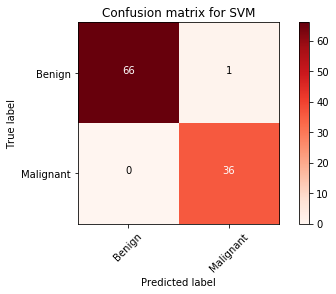

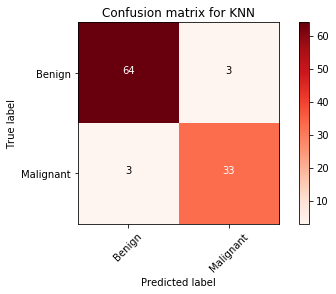

In [38]:
# print or plot  metrics / results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification report for SVR:\n')
print(classification_report(y_test, y2_SVC_model))

print('Classification report for KNN:\n')
print(classification_report(y_test, y2_KNN_model))


cm = confusion_matrix(y_test, y2_SVC_model)
classes = ['Benign', 'Malignant']
fig = plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix for SVM')
plt.colorbar()
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

normalize = False
fmt = '.2f' if normalize else 'd'

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


cm = confusion_matrix(y_test, y2_KNN_model)
classes = ['Benign', 'Malignant']
fig = plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix for KNN')
plt.colorbar()
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

normalize = False
fmt = '.2f' if normalize else 'd'

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

### Exercise 2


In [39]:
#Let’s say you have achieved an accuracy score xx% depending on your choice of classifier.
#Do you think it is a good score? If yes, what did you compare with?

from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
dmy_clf.fit(X_train,y_train)
y2_dmy_model = dmy_clf.predict(X_test)

print("Dummy classifier Accuracy :", accuracy_score(y_test, y2_dmy_model))
print("SVC Accuracy :", accuracy_score(y_test, y2_SVC_model))
print ("SVC is better than a random dummy classifier with respect to accuracy as shown!")


Dummy classifier Accuracy : 0.5436893203883495
SVC Accuracy : 0.9902912621359223
SVC is better than a random dummy classifier with respect to accuracy as shown!


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
